# Feature Scaling

This data contains information on annual income and spending score for 200 regular customers at a mall who took a survey. Spending score represents how much they're likely to spend.

Run the code below to load this dataset.

In [1]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/78/mall_customer_dataset.csv"
urlretrieve(url, "mall_customer_dataset.csv")
mall_customers = pd.read_csv("mall_customer_dataset.csv",index_col=0)
mall_customers

,Annual Income ($),Spending Score (1-100)
CustomerID,,
1,15000,39
2,15000,81
3,16000,6
4,16000,77
5,17000,40
...,...,...
196,120000,79
197,126000,28
198,126000,74


<hr style="height:2px;border-width:0;color:black;background-color:black">

Run the cell below and note that centroids are aligned in a parallel fashion and that the k-means clusters fail to fit the natural clusters in the data. This is because the two features in this dataset use vastly different scales. Annual income ranges in the tens of thousands while spending score ranges between 1-100.

Create a more accurate view of this scatter plot by making the axes scaled. This should help to visualize why the clustering algorithm clustered the data the way that it did.

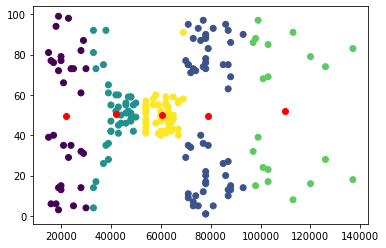

In [2]:
#Builds the kmeans clustering algorithm
from sklearn.cluster import KMeans
K=5
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers[["Annual Income ($)","Spending Score (1-100)"]])

#Plots the data points onto a scatter plot and colors them according to cluster
#The red dots represent the centroids of each cluster
import matplotlib.pyplot as plt
plt.scatter(mall_customers["Annual Income ($)"],mall_customers["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

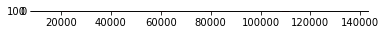

In [3]:
#Builds the kmeans clustering algorithm
from sklearn.cluster import KMeans
K=5
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers[["Annual Income ($)","Spending Score (1-100)"]])

#Plots the data points onto a scatter plot and colors them according to cluster
#The red dots represent the centroids of each cluster
import matplotlib.pyplot as plt
plt.scatter(mall_customers["Annual Income ($)"],mall_customers["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
#The code below forces the scatter plot to use the true scale of the chart
#Because the scale is so different, we can't even see the data in the chart
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a line chart that plots both features on the Y-axis. For the X-axis, create a range of values based on the length of the mall_customers dataset.

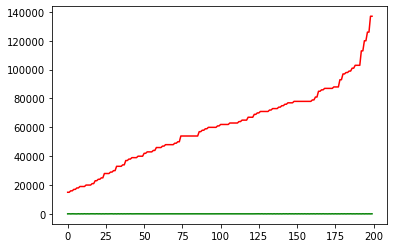

In [4]:
#Creates values for the x-axis which goes from 0 to 200 (the length of the dataset)
x = range(len(mall_customers))

#Imports the matplotlib library
import matplotlib.pyplot as plt

#Creates a plot where both features are on the y-axis
#We use the variable above for the x-axis
plt.plot(x,mall_customers["Annual Income ($)"],'red')
plt.plot(x,mall_customers["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with absolute maximum scaling. Use the graph from the question above to check the new scale of both data features.

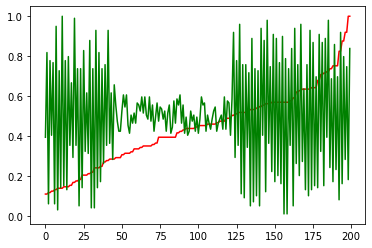

In [5]:
#We start by importing the function that lets us do absolute maximum scaling
from sklearn.preprocessing import MaxAbsScaler

#We then apply this to the mall customers dataset
abs_scaler = MaxAbsScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_abs
mall_customers_abs = pd.DataFrame(abs_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_abs
#We can see that both features now use values on the same scale
plt.plot(x,mall_customers_abs["Annual Income ($)"],'red')
plt.plot(x,mall_customers_abs["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with absolute maximum scaling. You should notice that the model is far more accurate at segmenting the data.

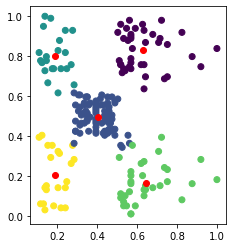

In [6]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_abs
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers_abs[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_abs["Annual Income ($)"],mall_customers_abs["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with min max scaling. Use the graph from the question above to check the new scale of both data features.

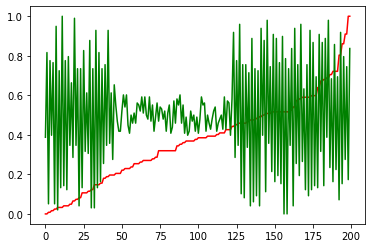

In [7]:
#We start by importing the function that lets us do min max scaling
from sklearn.preprocessing import MinMaxScaler

#We then apply this to the mall customers dataset
min_max_scaler = MinMaxScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_min_max
mall_customers_min_max = pd.DataFrame(min_max_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_min_max
#We can see that both features use values on the same scale
plt.plot(x,mall_customers_min_max["Annual Income ($)"],'red')
plt.plot(x,mall_customers_min_max["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with min max scaling. As with absolute maximum scaling, you should notice that the model is far more accurate at segmenting the data.

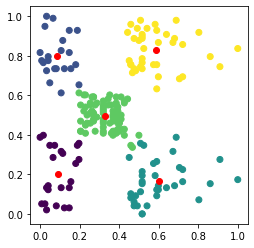

In [8]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_min_max
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers_min_max[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_min_max["Annual Income ($)"],mall_customers_min_max["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Check to ensure that both features in the dataset are normally distributed.

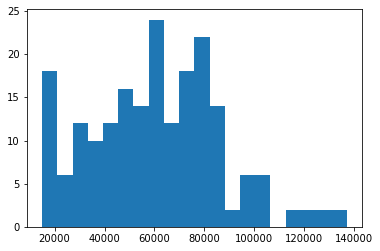

In [9]:
#This code builds a histogram of the annual income data
#The data appears somewhat normally distributed
plt.hist(mall_customers["Annual Income ($)"],bins=20);

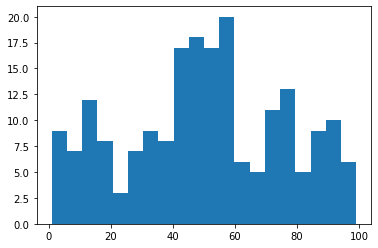

In [10]:
#This code builds a histogram of the spending score data
#The data appears somewhat normally distributed
plt.hist(mall_customers["Spending Score (1-100)"],bins=20);

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with standardization.

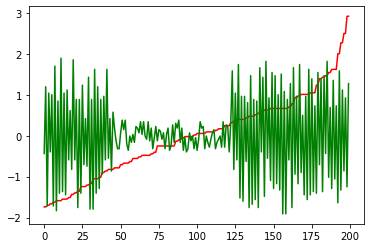

In [11]:
#We start by importing the function that lets us standardize our data
from sklearn.preprocessing import StandardScaler

#We then apply this to the mall customers dataset
std_scaler = StandardScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_std
mall_customers_std = pd.DataFrame(std_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_std
#We can see that both features now use values in the same scale
x = range(len(mall_customers))
plt.plot(x,mall_customers_std["Annual Income ($)"],'red')
plt.plot(x,mall_customers_std["Spending Score (1-100)"],'green')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with standardization.

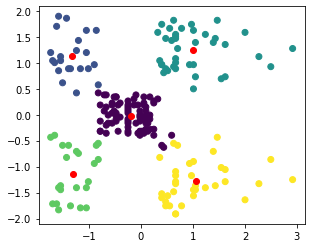

In [12]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_std
#In the output, we can see that the clusters more closely fit the natural clusters in the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit_predict(mall_customers_std[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_std["Annual Income ($)"],mall_customers_std["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with robust scaling.

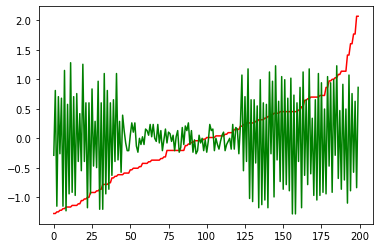

In [13]:
#We start by importing the function that lets us do min max scaling
from sklearn.preprocessing import RobustScaler

#We then apply this to the mall customers dataset
robust_scaler = RobustScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_robust
mall_customers_robust = pd.DataFrame(robust_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_robust
#We can see that both features use values in the same scale
x = range(len(mall_customers))
plt.plot(x,mall_customers_robust["Annual Income ($)"],'red')
plt.plot(x,mall_customers_robust["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with robust scaling.

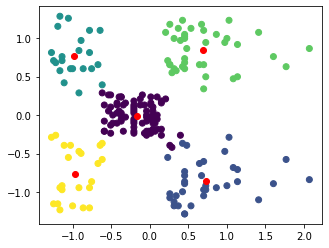

In [14]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_min_max
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit_predict(mall_customers_robust[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_robust["Annual Income ($)"],mall_customers_robust["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()

# Feature Selection

This data contains information on credit card repayment information for 30,000 customers.

We have a response feature here that shows whether or not a person defaulted on their debt in the following month. All other months are considered to be the predictor features.

This cell also contains the output of a decision tree along with performance metrics.

Run the cell below to run this model and output the metrics.

In [15]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/63/credit_card_default.csv"
urlretrieve(url, "credit_card_default.csv")
credit_card_default = pd.read_csv("credit_card_default.csv",index_col=0)
response = credit_card_default[["Defaulted Next Month"]]
predictors = credit_card_default.iloc[:,1:]

#Converts categorical features into dummy features
predictors=pd.get_dummies(predictors,drop_first=True)

#Gets training and testing versions of each dataset
#Note that below we can assign multiple variables at once
#This works because we're assigning 4 variables and the output of the function is a list with 4 elements
from sklearn.model_selection import train_test_split
p_train, p_test, r_train ,r_test= train_test_split(predictors, response, test_size=0.1, random_state=50)

#Builds and fits a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(p_train, r_train)

from sklearn.metrics import confusion_matrix, classification_report
r_predictions = tree.predict(p_test)
print(classification_report(r_test, r_predictions,target_names=["Paid","Defaulted"]))

              precision    recall  f1-score   support

        Paid       0.82      0.97      0.89      2288
   Defaulted       0.75      0.31      0.44       712

    accuracy                           0.81      3000
   macro avg       0.78      0.64      0.66      3000
weighted avg       0.80      0.81      0.78      3000



<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the Chi2 function as the score function, pick the best scoring features with the SelectKBest function.

In [16]:
#Note that Chi2 doesn't work with negative values, so we'll need to scale our data to remove negative values
#Ensure that you use predictors_min_max in the SelectKBest function!
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit_transform(predictors)
predictors_min_max = pd.DataFrame(min_max_scaler, columns=predictors.columns)

#Imports the chi2 and SelectKBest functions
from sklearn.feature_selection import chi2, SelectKBest

#Applies the function on the predictors
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(predictors_min_max,response)

#Displays the output of the predictors with their scores
import numpy as np
arr=np.array([predictors.columns,fit.scores_]).transpose()
predictor_scores=pd.DataFrame(arr,columns=["Predictors","Score"])
predictor_scores.sort_values(by="Score",ascending=False)

,Predictors,Score
2,PAY_DELAY1,201.517549
3,PAY_DELAY2,160.0273
4,PAY_DELAY3,129.692706
5,PAY_DELAY4,108.131709
6,PAY_DELAY5,92.59881
7,PAY_DELAY6,81.065996
0,Credit Card Limit,76.341829
23,Education level_University Degree,51.149551
20,Sex_Male,29.089555
22,Education level_High School,21.237973


<hr style="height:2px;border-width:0;color:black;background-color:black">

Redefine the predictors variable as only variables with a SelectBest score of >200.

In [17]:
#Redefines the predictors variable based on the values stored in the top_predictors variable
predictors=predictors[["PAY_DELAY1"]]

#Gets training and testing versions of each dataset
from sklearn.model_selection import train_test_split
p_train, p_test, r_train ,r_test= train_test_split(predictors, response, test_size=0.1, random_state=50)

#Builds and fits a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(p_train, r_train)

#Outputs values for precision, recall and accuracy
from sklearn.metrics import confusion_matrix, classification_report
r_predictions = tree.predict(p_test)
print(classification_report(r_test, r_predictions,target_names=["Paid","Defaulted"]))

              precision    recall  f1-score   support

        Paid       0.82      0.97      0.89      2288
   Defaulted       0.74      0.31      0.44       712

    accuracy                           0.81      3000
   macro avg       0.78      0.64      0.66      3000
weighted avg       0.80      0.81      0.78      3000



<hr style="height:2px;border-width:0;color:black;background-color:black">

# Dimensionality Reduction

The data for this exercise contains information on 64 patients with different varieties of leukemia. For each patient, this dataset records information about 22,284 different genes. Each gene has its own column, so this dataset has 64 rows and 22,284 columns. This is a clear use case for PCA.

To start we've also included a Decision Tree model that uses the gene data to predict what form of leukemia a patient has. Take note of the performance of this model as we'll attempt to improve it with PCA.

Run the code below to load the dataset, build the model, and output the performance metrics. 

In [18]:
import pandas as pd
from urllib.request import urlretrieve

#Reads the data
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/77/Leukemia_GSE9476.csv"
urlretrieve(url, "Leukemia_GSE9476.csv")
data=pd.read_csv("Leukemia_GSE9476.csv",index_col=0)

#Defines the response and predictors variables
response = data["type"]
predictors = data.drop(["type"], axis=1)

#Splits both the response and predictors variables into training and testing versions
from sklearn.model_selection import train_test_split
split = train_test_split(predictors, response, test_size=0.20, random_state=99)
predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

#Builds a decision tree model using the data and outputs performance metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(predictors_train, response_train)
response_predictions = classifier.predict(predictors_test)
print(classification_report(response_test, response_predictions,zero_division=0))

                  precision    recall  f1-score   support

             AML       0.60      0.75      0.67         4
     Bone_Marrow       1.00      1.00      1.00         4
Bone_Marrow_CD34       1.00      0.50      0.67         2
              PB       0.00      0.00      0.00         2
       PBSC_CD34       0.50      1.00      0.67         1

        accuracy                           0.69        13
       macro avg       0.62      0.65      0.60        13
    weighted avg       0.68      0.69      0.67        13



<hr style="height:2px;border-width:0;color:black;background-color:black">

Standardize both the training and testing variants of the predictors.

In [19]:
#Imports the necessary function
from sklearn.preprocessing import StandardScaler

#Stores the function in a variable
std_scaler = StandardScaler()
#Applies the function to both the training and testing versions of the predictors variables
predictors_train_std = std_scaler.fit_transform(predictors_train)
predictors_test_std = std_scaler.fit_transform(predictors_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Transform the standardized predictor variables into principal components using PCA. Adjust the value for n_components so that you maximize the performance of the model while minimizing the number of components that are kept.

In [20]:
#Imports the PCA function
from sklearn.decomposition import PCA
#Sets n_components to 2
#Just 2 PCA components has a stronger output than all 22,284 columns in the original dataset
#Raising to 3 components actually reduces performance, so 2 is clearly the optimal value
pca = PCA(n_components=2)

#Applies the PCA transformortion to both the training and testing versions of the predictors
predictors_train_pca = pca.fit_transform(predictors_train_std)
predictors_test_pca = pca.transform(predictors_test_std)

#Runs the decision tree model again on our PCA transformed data
#As we can see, by reducing the data, we improved performance as well as speed!
classifier = DecisionTreeClassifier()
classifier.fit(predictors_train_pca, response_train)
response_predictions = classifier.predict(predictors_test_pca)
print(classification_report(response_test, response_predictions))

                  precision    recall  f1-score   support

             AML       0.50      1.00      0.67         4
     Bone_Marrow       1.00      0.25      0.40         4
Bone_Marrow_CD34       1.00      0.50      0.67         2
              PB       1.00      1.00      1.00         2
       PBSC_CD34       1.00      1.00      1.00         1

        accuracy                           0.69        13
       macro avg       0.90      0.75      0.75        13
    weighted avg       0.85      0.69      0.66        13

